# SLU9 - Regression: Learning notebook

In this notebook we will cover the following:
* What is regression?
* Simple Linear Regression
* Gradient Descent
* Multiple Linear Regression
* Using Scikit Learn to perform regression

## What is regression? 

A modeling task which objective is to create a (linear or non-linear) map between the **independent variables** (i.e. the columns in your pandas dataframe) and a set of **continuous dependent variables** (i.e. the variable you want to predict) by estimating a set of **unknown parameters**. 

Examples of regression tasks:
* predicting house prices (example range: [100k\$; 500k\$]);
* predicting the rating that a user would assign to a movie (example range: [1 start; 7 stars]); 
* predicting the total sales for each day, in each shop of a shopping mall;
* predicting emotional descriptors for a song;
* predicting the trajectory of a fighter jet.

Nowadays, there are *a lot* of algorithms to solve this task but we will focus on one of the most easy to understand: **linear regression**. It is one of the most used regression methods in the world to this day due to how easy it is to (1) interpret the model, (2) implement it and (3) implement extensions that deal with datasets with few data points, noise and outliers. 

First, let's explore how **simple linear regression** works.

## Simple Linear Regression

This model is a special case of linear regression where you have a single feature. The model is, simply, a line equation

$$\hat{y} = \beta_0 + \beta_1 \cdot x$$

* $\hat{y}$ is the value predicted by the model; 
* $x$ is the input feature; 
* $\beta_0$ is the y-axis value where $x=0$, usually called the *intercept*; 
* $\beta_1$ tells you how much $\hat{y}$ changes when $x$ changes, usually called the *coefficient*.

Let's see what each parameter does in this model

In [80]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider, Dropdown
import ipywidgets as widgets

import matplotlib.pyplot as plt

import numpy as np


def plot_simple_regression(b0=0, b1=1, xlim=(-5, 5), ylim=(-5, 5)):
    x = np.linspace(-10, 10, 1000)
    y = b0 + b1 * x
    
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot(x, y)
    plt.plot([0, 0], ylim, 'g-', 
             xlim, [0, 0], 'g-', linewidth=0.4)
    
    
interact(plot_simple_regression, 
         b0=FloatSlider(min=-10, max=10, step=0.01, value=0), 
         b1=FloatSlider(min=-10, max=10, step=0.01, value=1), 
         xlim=fixed((-5, 5)), 
         ylim=fixed((-5, 5)));

interactive(children=(FloatSlider(value=0.0, description='b0', max=10.0, min=-10.0, step=0.01), FloatSlider(va…

The green plot represents both the x and y axes while the blue line is the $\hat{y}$ for each value of $x$. As you can see for yourself, if you decrease/increase $\beta_0$, the value where y cross $\hat{y}$ decreases/increases. If you increase/decrease $\beta_1$, the slope of the line increases/decreases.

Now, let's try to manually change $\beta_0$ and $\beta_1$ in order to fit a small dataset. In order to make your job easier, we added a metric that goes down when you use better parameter combinations

In [82]:
import pandas as pd

from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error

def plot_simple_regression_with_dataset(x, y, b0=0, b1=1, xlim=(-5, 5), ylim=(-5, 5)):
    plot_simple_regression(b0, b1, xlim, ylim)
    plt.scatter(x, y)
    
    y_hat = b0 + b1 * x
    
    return "Mean Squared Error (MSE): {}".format(mean_squared_error(y, y_hat))

x, y = make_regression(n_features=1, n_samples=100, noise=30.5, random_state=10, bias=200)
x = x[:, 0]
y /= 100
y *= 2.0

interact(plot_simple_regression_with_dataset, 
         b0=FloatSlider(min=-10, max=10, step=0.01, value=-1), 
         b1=FloatSlider(min=-10, max=10, step=0.01, value=-1), 
         x=fixed(x), 
         y=fixed(y), 
         xlim=fixed((-5, 5)), 
         ylim=fixed((-3, 8)));

interactive(children=(FloatSlider(value=-1.0, description='b0', max=10.0, min=-10.0, step=0.01), FloatSlider(v…

Ok, doing this manually sucks. So, humans developed optimization algorithms to allow machines to adjust $\beta_0$ and $\beta_1$ according to some data set. There are, at least, 3 categories of optimization procedures to do it:

1. iterative methods using gradients;
2. closed form solution through normal equations;
3. evolutionary methods like genetic algorithms or particle swarm; 
4. bayesian optimization.

Methods based on 3 and 4 are kind of an overkill at this point in time, they don't guarantee you the optimal set of parameters for the model and just a curiosity (well, to be honest, methods based on 4 have certain nice properties but let's no get into that rabbit hole, eventhough the hole has really nice candy and smells good). We will explore methods based on gradient descent because they provide a, somehow, universal approach to optimization tasks and are really simple to grasp.

## Gradient Descent

TODO

In the following code snippet, we will be minimizing a very simple function ($f(x) = x^2$), change the *learning_rate* parameter and notice the effect on the value of $f(x)$

Text(0.5,1,'learning rate: 0.1')

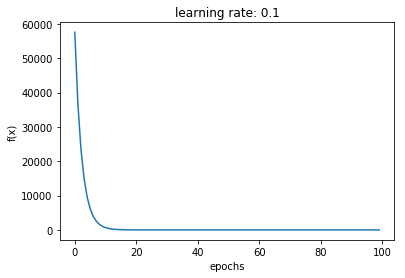

In [78]:
import matplotlib.pyplot as plt


f = lambda x: x ** 2
df_dx = lambda x: 2 * x
x = -300

epochs = 100
learning_rate = 0.1

data = []

for epoch in range(epochs):
    x = x - learning_rate * df_dx(x)
    data.append({
        'epoch': epoch, 'x': x, 
        'f(x)': f(x), 'df_dx': dy_dx(x)})
    
data = pd.DataFrame(data)

plt.plot(data['epoch'], data['f(x)'])
plt.ylabel('f(x)')
plt.xlabel('epochs')
plt.title('learning rate: {}'.format(learning_rate))

The higher the value of *learning_rate*, the faster $x$ converges to 0. TODO

## Multiple Linear Regression

## Using Scikit Learn to perform regression

After learning the basics about linear regression and how to estimate, iteratively, the best parameters for the model, it is time to learn how to use linear regression with Scikit Learn. 

[Scikit Learn][sklearn] is an industry standard for data science and machine learning and we will be using it extensively throughout the academy. Scikit Learn has two implementations of linear regression:
* [*sklearn.linear_model.SGDRegressor*][SGDRegressor]: uses stochastic gradient descent to estimate the intercept and coefficients. Also, this class allows more advanced forms of linear regression that is out of scope for moment.
* [*sklearn.linear_model.LinearRegression*][LinearRegression]: uses normal equations to estimate the best intercept and coefficients. Normal equations is the closed form solution for linear regression, meaning that you know exactly the number of steps and the guarantees about the solution. If you want to know more about this, [read this blog post][normal_eq].

[SGDRegressor]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor
[LinearRegression]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
[sklearn]: http://scikit-learn.org
[normal_eq]: https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

First, let's load the [Boston housing price dataset][boston_kaggle]

[boston_kaggle]: https://www.kaggle.com/c/boston-housing

In [61]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()
print(data['DESCR'])

x = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'], name='medv')

pd.concat((x, y), axis=1).head(5)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's experiment with the first linear regression implementation

In [63]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x, y)

print('\nTargets for the first 5 rows: \n', y.head(5).values)
print('\nPredictions for the first 5 rows: \n', lr.predict(x.head(5)))
print('\nTotal Score\n', lr.score(x, y))


Targets for the first 5 rows: 
 [24.  21.6 34.7 33.4 36.2]

Predictions for the first 5 rows: 
 [30.00821269 25.0298606  30.5702317  28.60814055 27.94288232]

Total Score
 0.7406077428649427


We got a R² score of ~74, which might be adequate for the first try. R² is one of the most well known metrics to evaluate regression models.We will dive into it in SLU12.

Modelling is not only about getting the best accurate model ever. If you get a big R² score for the wrong reasons (e.g. target leaks, too many useless variables), that model is kind of...useless. As such, let's look into how each feature contributes to the prediction

In [64]:
a = pd.Series(lr.coef_, index=x.columns, 
              name='Features Coefficients (sorted by magnitude)')
index = a.abs().sort_values(ascending=False).index
a = a.loc[index]
a

NOX       -17.795759
RM          3.804752
CHAS        2.688561
DIS        -1.475759
PTRATIO    -0.953464
LSTAT      -0.525467
RAD         0.305655
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
TAX        -0.012329
B           0.009393
AGE         0.000751
Name: Features Coefficients (sorted by magnitude), dtype: float64

_NOX_, according to the dataset documentation, refers to _"nitric oxides concentration (parts per 10 million)"_. The coefficient for _NOX_ is WAAAAAY BIGGER than the ones in the other features. Does it mean that (1) air pollution is a BIIIG problem in Boston, (2) people that buy houses in Boston REALLY REALLY REALLY HATE air pollution

![pollution_level_chinese](http://weknowmemes.com/generator/uploads/generated/g136362126738785004.jpg)

or does it mean that something was wrong in our approach? 

First of all, let's check some statistics about our features

In [65]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


it seems that there the scales for different features are *way* different from one another. For example, the domain of _CRIM_ is [0.006320; 88.976200] while _TAX_ is in [187; 711]. This means that, in the context of linear regression, the **coefficients are not comparable**.

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LinearRegression()

x_ = scaler.fit_transform(x)
x_ = pd.DataFrame(x_, columns=x.columns)

lr.fit(x_, y)

print('\nTargets for the first 5 rows: \n', y.head(5).values)
print('\nPredictions for the first 5 rows: \n', lr.predict(x_.head(5)))
print('\nTotal Score\n', lr.score(x_, y))


Targets for the first 5 rows: 
 [24.  21.6 34.7 33.4 36.2]

Predictions for the first 5 rows: 
 [30.00821269 25.0298606  30.5702317  28.60814055 27.94288232]

Total Score
 0.7406077428649428


After scaling all features into the same scale, we can now compare the the importance of each feature

In [67]:
a = pd.Series(lr.coef_, index=x_.columns, 
              name='Features Coefficients (sorted by magnitude)')
index = a.abs().sort_values(ascending=False).index
a = a.loc[index]
a

LSTAT     -3.748680
DIS       -3.104448
RM         2.670641
RAD        2.658787
TAX       -2.075898
PTRATIO   -2.062156
NOX       -2.060092
ZN         1.080981
CRIM      -0.920411
B          0.856640
CHAS       0.682203
INDUS      0.142967
AGE        0.021121
Name: Features Coefficients (sorted by magnitude), dtype: float64


Also, we can normalize the coefficients in order to see the relative weight of each feature

In [17]:
a.abs() / a.abs().sum()

LSTAT      0.169739
DIS        0.140568
RM         0.120925
RAD        0.120389
TAX        0.093996
PTRATIO    0.093373
NOX        0.093280
ZN         0.048946
CRIM       0.041676
B          0.038788
CHAS       0.030890
INDUS      0.006473
AGE        0.000956
Name: Features Coefficients (sorted by magnitude), dtype: float64

It seems that over 50% of the relative strength is concentrated in: 
* _LSTAT_ (decreases price): % lower status of the population
* _DIS_ (decreases price): weighted distances to five Boston employment centres
* *RM* (increases price): average number of rooms per dwelling
* _RAD_ (increases price): index of accessibility to radial highways

Now, time to use SGDRegressor. As previously stated, this class allows fine tuning regarding learning rate, weights constraints, extensions of gradient descent, etc. We will use the configuration that allows the most similar behavior to the one described for stochastic gradient descent.

In [69]:
from sklearn.linear_model import SGDRegressor

learning_rate = 0.001
epochs = 100

lr = SGDRegressor(random_state=10, 
                  penalty=None, 
                  shuffle=True, 
                  learning_rate='constant', 
                  eta0=learning_rate, 
                  max_iter=epochs)

lr.fit(x, y)

print('\nTargets for the first 5 rows: \n', y.head(5).values)
print('\nPredictions for the first 5 rows: \n', lr.predict(x.head(5)))
print('\nTotal Score\n', lr.score(x, y))


Targets for the first 5 rows: 
 [24.  21.6 34.7 33.4 36.2]

Predictions for the first 5 rows: 
 [-8.81456209e+13 -9.34010426e+13 -8.94837901e+13 -8.95555858e+13
 -9.13474538e+13]

Total Score
 -5.973466231191271e+25


WTF?! We got prediction overshootings and an AWFUL R² score! Is this related to feature scaling? Let's check if that is the case.

In [70]:
from sklearn.preprocessing import StandardScaler

learning_rate = 0.001
epochs = 100

lr = SGDRegressor(random_state=10, 
                  penalty=None, 
                  shuffle=True, 
                  learning_rate='constant', 
                  eta0=learning_rate, 
                  max_iter=epochs)

scaler = StandardScaler()

x_ = scaler.fit_transform(x)
x_ = pd.DataFrame(x_, columns=x.columns)

lr.fit(x_, y)

print('\nTargets for the first 5 rows: \n', y.head(5).values)
print('\nPredictions for the first 5 rows: \n', lr.predict(x_.head(5)))
print('\nTotal Score\n', lr.score(x_, y))


Targets for the first 5 rows: 
 [24.  21.6 34.7 33.4 36.2]

Predictions for the first 5 rows: 
 [29.69419554 24.75456216 30.16659133 28.09211046 27.46078478]

Total Score
 0.7380980597701932


I guess we have our answer. Unlike _LinearRegression_, **having the same scale is not an option** for _SGDRegressor_.

In [71]:
a = pd.Series(lr.coef_, index=x_.columns, 
              name='Features Coefficients (sorted by magnitude)')
index = a.abs().sort_values(ascending=False).index
a = a.loc[index]
a

LSTAT     -3.680366
DIS       -3.181424
RM         2.634311
RAD        2.633794
PTRATIO   -2.035668
NOX       -1.982095
TAX       -1.931509
ZN         1.031784
CRIM      -0.891170
B          0.809772
CHAS       0.694754
INDUS      0.168438
AGE        0.087407
Name: Features Coefficients (sorted by magnitude), dtype: float64

There are several steps we didn't include: 
* Exclude the feature _CHAS_ from the scaler. _CHAS_ is a dummy feature (i.e. the result of categorical feature encoding) and isn't a continuous feature per se.
* Perform correlation analysis in order to avoid including 2, or more, features that are highly correlated. When using highly correlated features in a linear model, you are violating the assumption of indepe TODO
* We didn't remove outliers. This is a problem for models like linear regression due to sensivity to outliers. Fortunately, there are implementations for robust linear regression within scikit learn ([RANSAC][RANSAC], [Theil-Sen][Theil-Sen] and [Huber][Huber]).
* We didn't perform correlation analysis between each input feature and the target. 

We didn't include those steps but, with all you have learned so far in the academy, you are able to perform those by yourself. :)


[RANSAC]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor
[Theil-Sen]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html#sklearn.linear_model.TheilSenRegressor
[Huber]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor